In [1]:
from pymongo import MongoClient

In [2]:
db = MongoClient().python_test

In [3]:
# 빅데이터 저장 ppt 82p
## 파일들을 조회하기
# 이미지에 가로와 세로가 동일해야지 머신러닝으로 돌릴 수 있다.
image_list = list(db.fs.files.find())

In [4]:
# 가로, 세로를 동일하게 변경해주기
IM_WIDTH = 200
IM_HEIGHT = 200

In [5]:
file_detail = image_list[2]

In [6]:
file_detail

{'_id': ObjectId('609105aabbab17251c576cc7'),
 'filename': 'IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg',
 'metadata': {'contentType': 'image/jpg', 'type': 'cat'},
 'chunkSize': 261120,
 'md5': '577e61eaf420b3f355f8aedb82c42d29',
 'length': 18150410,
 'uploadDate': datetime.datetime(2021, 5, 4, 8, 28, 27, 164000)}

In [7]:
# filename : key값으로 값을 리턴해준다.
# 이미지 파일만 확인한 것, 내용은 아니다.
file_detail['filename']

'IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg'

In [8]:
from gridfs import GridFS

In [9]:
fs = GridFS(db)

In [10]:
# 고양이 사진의 내용을 가져옴
f = fs.get_last_version(filename=file_detail['filename'])

In [11]:
# 파일 내용을 리턴함
data = f.read()

In [13]:
from PIL import Image
from io import BytesIO

In [14]:
# 이미지 출력
# 그림을 머신러닝할 예정
im = Image.open(BytesIO(data))

In [15]:
# 흑백 사진으로 만들기
im = im.convert('L')

In [16]:
# 이미지의 사이즈를 변경해주기
# im에는 숫자가 저장되어 있다. 검정: 255, 흰색: 0, 회색: 0 < 회색 < 255
im = im.resize((200, 200))

In [17]:
import numpy as np

In [18]:
# 이미지로 보이는 im을 숫자로 보기
# im은 200 * 200으로 200칸, 200줄의 배열이다.
# 0(흰색) ~ 255(검은색)사이의 정수
# 머신러닝은 0 ~ 1사이에 실수로 받는 것을 좋아해서, 변환해주어야한다.
np.array(im)

array([[71, 67, 64, ..., 70, 70, 70],
       [71, 67, 64, ..., 71, 71, 71],
       [72, 67, 64, ..., 71, 71, 70],
       ...,
       [61, 72, 76, ..., 52, 48, 54],
       [63, 60, 69, ..., 48, 58, 54],
       [70, 62, 64, ..., 51, 51, 56]], dtype=uint8)

In [19]:
# 0 ~ 1사이의 실수로 변경하기
# 255로 나누면 0(흰색)이면 나누면 0이 되고, 255(검은색)이면 나누면 1이 된다.
np.array(im)/255

array([[0.27843137, 0.2627451 , 0.25098039, ..., 0.2745098 , 0.2745098 ,
        0.2745098 ],
       [0.27843137, 0.2627451 , 0.25098039, ..., 0.27843137, 0.27843137,
        0.27843137],
       [0.28235294, 0.2627451 , 0.25098039, ..., 0.27843137, 0.27843137,
        0.2745098 ],
       ...,
       [0.23921569, 0.28235294, 0.29803922, ..., 0.20392157, 0.18823529,
        0.21176471],
       [0.24705882, 0.23529412, 0.27058824, ..., 0.18823529, 0.22745098,
        0.21176471],
       [0.2745098 , 0.24313725, 0.25098039, ..., 0.2       , 0.2       ,
        0.21960784]])

In [20]:
# 몇줄에 몇칸이지를 확인하기(shape)
# 앞은 줄, 뒤는 칸을 나타낸다.
(np.array(im)/255).shape

(200, 200)

In [21]:
# Support Vector Machine 알고리즘(SVM)사용할 예정
# 알고리즘마다 필요한 칸과 줄의 수가 다르다.
# SVM은 줄이 무조건 한 줄이어야한다.
# flatten()을 사용해서 한 줄로 변경할 수 있다.200줄 200칸을 변경한 것으로 한 줄에 40000칸이 들어있다.
# DataType : Double타입(실수 8byte)로 이루어져있다.
im = (np.array(im)/255).flatten()
# 실수의 기본 타입이면 뒤에 dtype이 나오지 않는다.

In [22]:
# Double타입에서 float타입으로 변경하기(astype)
# 머신러닝은 float 타입(실수 4byte)로 진행해야 더 정확해진다.
# dtype이 float임을 확인할 수 있다.
im.astype('float32')

array([0.2784314 , 0.2627451 , 0.2509804 , ..., 0.2       , 0.2       ,
       0.21960784], dtype=float32)

In [23]:
from pymongo import MongoClient
from gridfs import GridFS

In [24]:
from PIL import Image
from io import BytesIO

In [25]:
db = MongoClient().python_test

In [26]:
fs = GridFS(db)

In [27]:
image_list = list(db.fs.files.find())

In [28]:
# 이미지의 가로, 세로 변경
IM_WIDTH = 200
IM_HEIGHT = 200

In [29]:
# 이미지를 읽어서 저장할 리스트
images = []
# 고양이면 1, 강아지면 0을 저장할 리스트
labels = []

In [30]:
import numpy as np

In [31]:
for file_detail in image_list:
    # 파일명 조회
    file_name = file_detail['filename']
    print('file_name:', file_name)
    # 파일명이 일치하는 마지막 파일의 내용을 가져올 객체
    f = fs.get_last_version(filename = file_name)
    # 파일의 내용을 data에 저장
    data = f.read()
    
    if len(data) > 0:
        # data의 내용을 이미지로 변환해서 im 변수에 넣기
        im = Image.open(BytesIO(data))
        # im을 흑백으로 변환
        im = im.convert('L')
        # 이미지 파일의 크기를  200 x 200으로 변경
        im = im.resize((IM_WIDTH,IM_HEIGHT))
        # 이미지 파일에 저장된 값은 0(흰색) ~ 255(검은색)사이의 값이 저장됨
        # 머신러닝의 정확도를 위해서 255로 나누어 0 ~ 1사이의 실수로 변경
        # SVM을 사용하기 위해, flatten()으로 1차원으로 변경
        im = np.array(im).flatten() / 255.0
        # im에 저장된 데이터의 타입을 머신러닝을 위해서 float32로 변환
        im = im.astype('float32')
        # imagesdp im을 추가
        images.append(im)
        
        # file_detail['metadata']['type']에 cat이 포홤되어 있으면 1을, 아니면 0을 label에 리턴
        label = 1 if 'cat' in file_detail['metadata']['type'] else 0
        # labels에 label 추가하기
        labels.append(label)
        

file_name: IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg
file_name: I5moydFuUMwFi3oEOPX959RlIZqY.jpg
file_name: IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg
file_name: IEsKZxZsl_W-4jcOZ3RRpfDvVBKc.jpg
file_name: I83NJ67RXsHAWWga9wDSmnhAfE98.jpg
file_name: IG79sqb-FJtxWBSNtNymn1-QaJbc.jpg
file_name: IpOX3MIQao76aQ5DO8uSEE3KqAvc.jpg
file_name: mosaakTul0.jpeg
file_name: IR3Ystm-qKc2kqBL3LHe-gfI_KLI.jpg
file_name: IKAGAvCAUDkUL3Ed7_clw-dyRzXI.jpg
file_name: 0000109645_001_20210414160328325.jpg
file_name: Iim65cm5HWXqjZXcxmSgqhWxFTNo.jpg
file_name: I-A0r1LdiJ3yO6c6ldxnBShIDofo.jpg
file_name: I1hoQJPcjdBUwaPKW-Mo7DKRTWKQ.jpg
file_name: 0000050851_001_20210207121759617.jpg
file_name: InMPojw89TUVzGSOxu-cLdP4z9YE.jpg
file_name: It2EXojHG65IVMKt3AUYXXvI8aCk.jpg
file_name: IsCLLxO4nAmF8PZYz7qG1SDs5k6k.jpg
file_name: I3zHrwehDjdZoKPssXEZcB82vo8Y.jpg
file_name: IBjDo1mQMyU7UqQTWiTuA9O_1ZBw.jpg
file_name: INH-dd7aSQJ8LMOJUSoLxN-cd30I.jpg
file_name: 0000100240_001_20210306160159601.png
file_name: thumb_9bi8m4p_202012302058

C:\Users\Admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


file_name: 5a8fa361a54930af8a765b2679c88b9c.jpg
file_name: 609714_image_1_20210112170035640.jpg
file_name: IGLsMME2tKiXe4D5vNZlfxDJPTHM.jpg
file_name: IP4sawHDuGc-N7KIetB0qoQOm9vM.jpg
file_name: Iqg1oclNNDLAXoksLZBxx3-DejKk.jpg
file_name: 57edb31e5872cce7c81cf901e4ade89a--cute-cats-adorable-animals.jpg
file_name: I3nNx68qbA621Sy6Hv9KvnEkl-Xg.jpg
file_name: I-7WLTcToNOuRlJKj7eBJEe5ol-c.jpg
file_name: I3mkNPmGK5Q8-Ej0t3tStYpynm8Q.jpg
file_name: 10700860015938139_1604904605.jpg
file_name: IUyEcUi9jYsSvAFbQpmseFdMatrU.jpg
file_name: 0000052909_004_20210316163002543.jpg
file_name: IBvse4A08VxJXZn71hImUA6EFMyg.jpg
file_name: 0000041887_001_20200923084942888.jpg
file_name: 20461861653657302_2040364378.jpg
file_name: 15239924701988596_1945492768.jpg
file_name: 26529571884.20210326180434.jpg
file_name: 14191204345868055_1638250179.jpg
file_name: 4pg0m7s_202111694147318283.jpg
file_name: 25695172580.20210121221531.jpg
file_name: 131a55470e6c6ac47d92da0241ed34d2.JPG
file_name: IlbLDO44hHoq-8sN9xv

file_name: 0000046589_001_20201116110222712.jpg
file_name: 56063771.2_59_20130623234402.jpg
file_name: 0000001050_002_20181204154505470.jpg
file_name: IE001734949_STD_99_20140727152902.jpg
file_name: eb78e2d1f9d7d3491fc6439326376e3b--bookshelves-himalayan-cat.jpg
file_name: O1CN01vGqKPm1a0mw5q6s2E_3326773268.jpg
file_name: IjpCq7LEjzjQuqgBPgN9ZFQJKGF0.jpg
file_name: Isu-rnSJZkbmpEzyf_YCyjqsQ_c4.jpg
file_name: 24934519005.20201122022946.jpg
file_name: Iko7C10Tq3oP9n-MTaE4fuyupUdc.jpg
file_name: I-g_Mx0mkGa9RChQ4YHQpjrCnf_E.jpg
file_name: IRtJm-vXmn-XCcBQlUlr5TwJryxg.jpg
file_name: ISjoaLDBeON_cEXTaBZGtxVolxCk.jpg
file_name: 0000054553_002_20210414155142433.jpg
file_name: IP8tMPJ4pzIV-5_V2LZ78aXzgF1s.jpg
file_name: IrLrR5gRzpCsWUHvogxMa6bm7K8g.jpg
file_name: Ib8PaX0koMG7rAs5pe4mTirWKu0M.jpg
file_name: ILCKNnEnwXXO3HedfuFB_OCwlrqc.jpg
file_name: InDSp1BOCDGsuTCYUvKfMJEmU-Uw.jpg
file_name: mosaqQxZGu.jpeg
file_name: 0000133407_001_20210423135402161.jpg
file_name: IxW41NK_SHYShqi6Ox76cX21Ol

file_name: SSI_20130915144939_V_59_20130915145703.jpg
file_name: mug_obj_137982593664254880.jpg
file_name: 1c24f57573970965184622dfa1471803.jpg
file_name: IARwGTRep0z4AojdAe5qjcCrcM5E.jpg
file_name: 0000466150_001_20200821120027060.jpg
file_name: 6b9e243dc4b2f413dd461e5d4dbe33d2.jpg
file_name: 0000038582_001_20200826083904528.jpg
file_name: Iz62ewy5AGHWInmMREMnTeC2GKRg.jpg
file_name: I1gwRhC0nTBc4E5IYG1Z4X_CxxvQ.jpg
file_name: INM4SMcJsyYofR854jMEyudcKsRw.jpg
file_name: 333015484f098ba76bdbd5c3f3c206b2.jpg
file_name: NISI20081116_0000268013_web.jpg
file_name: 0000000273_002_20170904144451764.jpg
file_name: IuJQ_zoxO6hNkw6xc602kE-hD_bk.jpg
file_name: 15daac1ee5687cf7596e2cb5170ae361--prettiest-cat-devon-rex-cats.jpg
file_name: 20161019_1697647_99_20161019153816.jpg
file_name: I84MZ0WDyVJRa_SV3S5TVSENPfWk.jpg
file_name: 0000029657_001_20200602083611769.jpg
file_name: nZfZFINuuKVB7rFp6ht3uHmoFjAqqZ5VrsnpSPtGW49R6V_vjjuhIVw8TQ-ARRzunnw
file_name: 0000006262_002_20190916172921947.jpg
file_n

file_name: 0000001261_002_20180115145001847.jpg
file_name: IzfXBwjLROjNifG0tTmD6U_Dq8Ok.jpg
file_name: 601ed796bff957758110a474c71fae7c--maine-coon-kittens-blue-eyes.jpg
file_name: 14264234516CCDF40E1671
file_name: 20170314140720-PmlTRHpuvFIoQoRP1l8E0-v4
file_name: 0000032610_001_20200703082630375.jpg
file_name: b9f0705c1c227e0aef8a30a6e5f7eb0a--orange-kittens-white-kittens.jpg
file_name: 0000001110_001_20171221152550443.jpg
file_name: 0000003490_003_20181031174645695.jpg
file_name: I5YV1hKdqMrkAX5QhX0PGhRnYBkc.jpg
file_name: 0000041175_001_20200917111907806.jpg
file_name: 0000039385_001_20200902075658055.jpg
file_name: IHIqLkEafaFwZcElScUEhpLtATdM.jpg
file_name: 0000034436_001_20200722161635274.jpg
file_name: 11746254545845048_896367134.jpeg
file_name: IMzZs-g-NI3lQj_42mhIeVUxpwCs.jpg
file_name: 36378ba7a41f1d1553940220c711675e--moustache-kitten.jpg
file_name: 20140729103941486010_59_20140729104603.jpg
file_name: 0000042358_001_20200926134533453.jpg
file_name: 0000003889_008_201812141

file_name: IP_q5t0uhfqupaTJx-r9Dvjst5As.jpg
file_name: IJD5uJrUbM4NLz0Vj8nweB6NE4RE.jpg
file_name: ISj9nw46m3S7ZWsUXXbBrc7VmOQo.jpg
file_name: 26529697071.20210326181525.jpg
file_name: IitrvDGkDPcV9U4PIkmypUnLGSlQ.jpg
file_name: 11109_mainiamge3.jpg
file_name: 18935347259431695_204009600.jpg
file_name: IUXuPla84ZMcJa7Zjlz18U407IOI.jpg
file_name: 0000049425_001_20210112110238865.jpg
file_name: 20170612172658795_img1.jpg
file_name: 0000051587_005_20210223100410329.jpg
file_name: 26434108522.20210320191336.jpg
file_name: 11837201666164945_1265509545.jpg
file_name: 19375243449639073_256724419.jpg
file_name: 16624441428895125_1487508902.jpg
file_name: 450_450_O1CN01kTUD972EhSUJKYaTu_2201411448776.jpg
file_name: 0000050156_003_20210125105040726.jpg
file_name: 0000050791_006_20210205140523504.jpg
file_name: I2cyiD9_U5pcT6LAY2typv1smfOM.jpg
file_name: 25527394426.20210107214935.jpg
file_name: 16858431257449591_1875767868.jpg
file_name: IpCcdJFkHQM7t58s7lPaK68jxTkg.jpg
file_name: 20130906000402

file_name: 0000025296_001_20200421133450259.jpg
file_name: 0000008847_001_20200112150618497.jpg
file_name: It_Q7AGLGwOKe5U7UR54icXVOIbs.jpg
file_name: 0000001427_001_20190808185251758.jpg
file_name: I5kzFTRfWTXxcPvwo6Rf-iD_a3V4.jpg
file_name: 115692_1.jpg
file_name: 50273fa3d83407bb076232957da6e734--cute-cats-funny-cats.jpg
file_name: 18067712004756786_724627714.jpg
file_name: I56WVumxcN5fWMsAJh0daS6UAcKo.jpg
file_name: mug_obj_140007965936566153.jpg
file_name: 0000039195_001_20200830112856555.jpg
file_name: IC2KDgmyJippZ3iY2SftiKGoYSYA.jpg
file_name: 13401898365402242_397065510.jpg
file_name: 94e133b949ecc7a1e24190b0b3f0676d.jpg
file_name: IndgnbQyLz2i7cKpkM9-RU2ExCv0.jpg
file_name: It6Zr0o2duyEBiQBFqOLoRFqNolY.jpg
file_name: 12b0f777425e101c041025c1cef19d90.jpg
file_name: IoNB1TxuziqQManUCbJV5S5DMM3s.jpg
file_name: 5e97e7eed07d929587ec0b888f738748--ginger-kitten-ginger-cats.jpg
file_name: I661S6jezsyaM6KmzXP0xP329kH4.jpg
file_name: I_aEE6mC8JdXbaz3A1B3pQId7UJ0.jpg
file_name: 00000287

file_name: 0000048184_005_20201215165526814.jpg
file_name: ISqqDXLFi6-QvYf3QT5yn5u4cj3E.jpg
file_name: 0000009487_001_20200116090418994.jpg
file_name: IW8ogHJMPjbznY4Dsf4ZT0bzVzfo.jpg
file_name: 0000028309_001_20200518083405996.jpg
file_name: IDnSwKS2VNP6U8S2gjHoeBIgS8Qo.jpg
file_name: Ic6Ah7vH_um3RjYMWfWiUVhdl_jo.jpg
file_name: Ikax9xVyde7FGxwQa-HGCzhfxmUM.jpg
file_name: 0000043754_001_20201013145946686.jpg
file_name: mug_obj_139174552461334247.jpg
file_name: IRCQIvGm8GSbGKCt1GRlV_P1cXNo.jpg
file_name: 2012120117343412304_1_59_20121202101103.jpg
file_name: 0000037206_001_20200814113048195.jpg
file_name: 0000029731_001_20200602141614365.jpg
file_name: IB8s51J1yJOLDQrqIn5geoI4-3Dk.jpg
file_name: 0000046492_001_20201114113101449.jpg
file_name: 0000035917_001_20200805083643561.jpg
file_name: 15273_detail_4166.jpg
file_name: I3kmthLbOpD2GWXbkyDwqTdb3WoQ.jpg
file_name: 0000049638_001_20210116133521670.jpg
file_name: a654f563e410c2b99082f549ba5f431c--samoyed-animals.jpg
file_name: 0000017848

file_name: 0000051392_001_20210217110041360.jpg
file_name: 0000038842_001_20200827113858183.jpg
file_name: IgGXCNg64RHwxcxaAu_kZMNEXHG4.jpg
file_name: 0000040885_001_20200915111712517.jpg
file_name: 0000050072_001_20210123141221107.jpg
file_name: IJ3sZXLKdONhhD8XQJctbTkiieIA.jpg
file_name: 0000048324_001_20201217163815044.jpg
file_name: mosa5geQbk.jpeg
file_name: 0000031885_008_20200624164826861.jpg
file_name: I9XW_TsgbT_aYsjom_nRTJDFvh4k.jpg
file_name: IX_3DKoRGrbz6iNLt7kE5TLurJ_M.jpg
file_name: dd59c30c4bd17bae5313cc757339356f--baby-huskies-huskies-puppies.jpg
file_name: 0000050362_001_20210128163627554.jpg
file_name: 17963291004345549_1143707138.jpg
file_name: 47d4bb5b6b90157d82acbe283a12ed13--raincoat-the-rain.jpg
file_name: I7Y0_kMeumJbqmkbk7MyKO3sOhZ0.jpg
file_name: 0000036154_001_20200806105445109.jpg
file_name: ICCewdXJKQ0-cUu5-ClMuxYrrZ2o.jpg
file_name: 0000028539_001_20200521105404413.jpg
file_name: 0002883820_001_20200801203710391.png
file_name: IeW7loIaLY_i_Q1crhVpgBNkpvfU.

file_name: 26225659186.20210303202415.jpg
file_name: 13034754713007363_1580862111.jpg
file_name: 0000696251_001_20210331205006444.jpg
file_name: 0000051863_001_20210227114641081.jpg
file_name: 13068697996134341_1785376466.jpg
file_name: 0000054320_001_20210410122812768.jpg
file_name: 7ed19a8ee445384ef88956663bc36e2c--springer-spaniel-puppies-spaniel-dog.jpg
file_name: IQGhE_K9hcDsMElxbs_OcdlpU8-s.jpg
file_name: 0000053218_001_20210322140120940.jpg
file_name: 0000051723_001_20210226141953920.jpg
file_name: 0000051566_001_20210221112859185.jpg
file_name: 16324242685069083_835587459.jpg
file_name: 0000054943_001_20210420161817607.jpg
file_name: I7srodbrZ47QVDWJJh97IQPD0vGg.jpg
file_name: 0000051092_001_20210211122018590.jpg
file_name: 0000052973_001_20210317151248549.jpg
file_name: 0000052123_001_20210304154247584.jpg
file_name: 0000050744_001_20210204155058518.jpg
file_name: fae011d0265ed7f52dcf5f2d5f7b151b--doberman-love-doberman-pinscher.jpg
file_name: 18251723448175130_1779688230.jpg


file_name: 0000019923_001_20200313085636431.jpg
file_name: IC94FgwPp4UWa7MoYSCN6QQF8Luw.jpg
file_name: 0000029714_001_20200602094811657.jpg
file_name: I9OGdLEqwQttjKuyygHbf8cwlVXU.jpg
file_name: 0000039653_001_20200904105500174.jpg
file_name: 0000036754_001_20200811144646822.jpg
file_name: IHG41TE0y2pP8ujWhEv0GUMrhlYQ.jpg
file_name: IRatW0-1WKZUAnx73zRN6EVLZ2qY.jpg
file_name: 0000037737_001_20200819111050321.jpg
file_name: IhZspHG6j8tcUKXgbmJs6MFPzHhA.jpg
file_name: 40576_detail_97861525666958.jpg
file_name: IcshfVgeEUAS3sEefD4UBbhQae3A.jpg
file_name: 0000026791_001_20200505104253893.jpg
file_name: 0000032472_001_20200630110428272.jpg
file_name: 0000028237_001_20200516185603119.jpg
file_name: 0000043565_001_20201009133935180.jpg
file_name: Ikl_L0tS-2qRb_PoaNV454nxFFpQ.jpg
file_name: 0000028008_001_20200515093202792.jpg
file_name: a9a65ffeef24844c9d071c52121c795a--titi-lucca.jpg
file_name: Imil1OiTlp1O_DXMuJHljrHe8SnQ.jpg
file_name: 0000042973_001_20201004104200855.jpg
file_name: 000002

file_name: 202103101725556695902_20210310173257_02_20210310173619553.jpg
file_name: 59365_detail_96251569463208.jpg
file_name: 0000033030_001_20200708100030526.jpg
file_name: 53019_detail_87211570517015.jpg
file_name: 13926_detail_03231482490449.jpg
file_name: 4283_detail_9327.jpg
file_name: O1CN01kTqn7T2CavfPB4Vf7_2209983028491-0-cib.jpg_1200x1200.jpg
file_name: 0000030565_001_20200610112417687.jpg
file_name: 0000042226_001_20200925104641109.jpg
file_name: In8eVE0sY5tiupZLl4uWfT3gfsOI.jpg
file_name: I6ezVPs5s5DNXNlggc_YJ6p7d6B0.jpg
file_name: 16372_detail_7901.jpg
file_name: IYhwrWLsaOnWyUYOdpX23lOqVkVc.jpg
file_name: I92wUBBjK2VSfOhQifOjPrs1wVvk.jpg
file_name: 10020_detail_24921535014358.jpg
file_name: 0000038726_001_20200827080254166.jpg
file_name: 17804e21ea90c94d0ca54a3d10eb2974--flat-coat-retriever-flat-coated-retriever-puppy.jpg
file_name: IT3GowSA-CUwHmy-JEI6xIaLylL4.jpg
file_name: 325_detail_6540.jpg
file_name: 34004_detail_57261488899578.jpg
file_name: b1b66c575068d235ce7b7a3

In [32]:
# 고양이와 강아지가 저장된 리스트 images를 배열로 변환
images_arr = np.array(images)
# 고양이는 1, 강아지는 0으로 저장된 labels를 배열로 변환
labels_arr = np.array(labels)

In [33]:
# 고양이 1, 강아지 0
labels_arr

array([1, 1, 1, ..., 0, 0, 0])

In [34]:
from sklearn.model_selection import train_test_split
# 학습데이터와 테스터데이터로 75%, 25%로 분리하기
X_train, X_test, y_train, y_test = train_test_split(images_arr, labels_arr)

In [35]:
# 빅데이터 저장 ppt 91p
# SVM을 이용한 학습
from sklearn import svm

In [36]:
# svm.SVC() : SVM을 실행, X_train : image 배열, y_train : label 배열
# X_train과 y_train은 같은 길이로 순서가 맞는다.
# X_train에서 y_train이 0인 애들,  X_train에 y_train이 1인 애들을 나누는 초평면을 만든다. 
# 현재 SVM은 40000차원으로 이루어져있다.
SVM = svm.SVC().fit(X_train, y_train)

In [37]:
# X_test에서 두개만 뽑아서 확인해보기
X_test[0:2]

array([[0.17254902, 0.36862746, 0.34117648, ..., 0.12941177, 0.15686275,
        0.83137256],
       [0.8235294 , 0.81960785, 0.8235294 , ..., 0.8980392 , 0.89411765,
        0.8901961 ]], dtype=float32)

In [38]:
# 랜덤이니 각자 출력값이 다르다.
# 고양이: 1, 강아지: 1
SVM.predict(X_test[0:2])

array([1, 1])

In [39]:
# 진짜 값을 확인하기
y_test[0:2]

array([1, 1])

In [40]:
np.sum(p==y_test)

NameError: name 'p' is not defined

In [ ]:
# 테스터 데이터의 정확도 출력
np.sum(p==y_test) / len(p==y_test)

In [41]:
# 테스터 데이터의 정확도 출력
SVM.score(X_test,y_test)

0.582995951417004

In [42]:
# 새로운 이미지 확인
new_image = []

In [43]:
# 예측할 이미지를 읽어서 image에 저장
image = Image.open('c:/ai/workspace/mongodb/test07.jpg')
# 흑백으로 변환
im = image.convert('L')
# 크기 변환
im = im.resize((IM_WIDTH, IM_HEIGHT))

# SVM설정
im = np.array(im).flatten() / 255.0
im = im.astype('float32')
new_image.append(im)

In [44]:
new_image_arr = np.array(new_image)
new_image_arr

array([[0.00784314, 0.00784314, 0.00392157, ..., 0.49411765, 0.5019608 ,
        0.49019608]], dtype=float32)

In [45]:
# 고양이1, 강아지0
predict = SVM.predict(new_image_arr)
predict[0]

1

In [46]:
import matplotlib.pyplot as plt

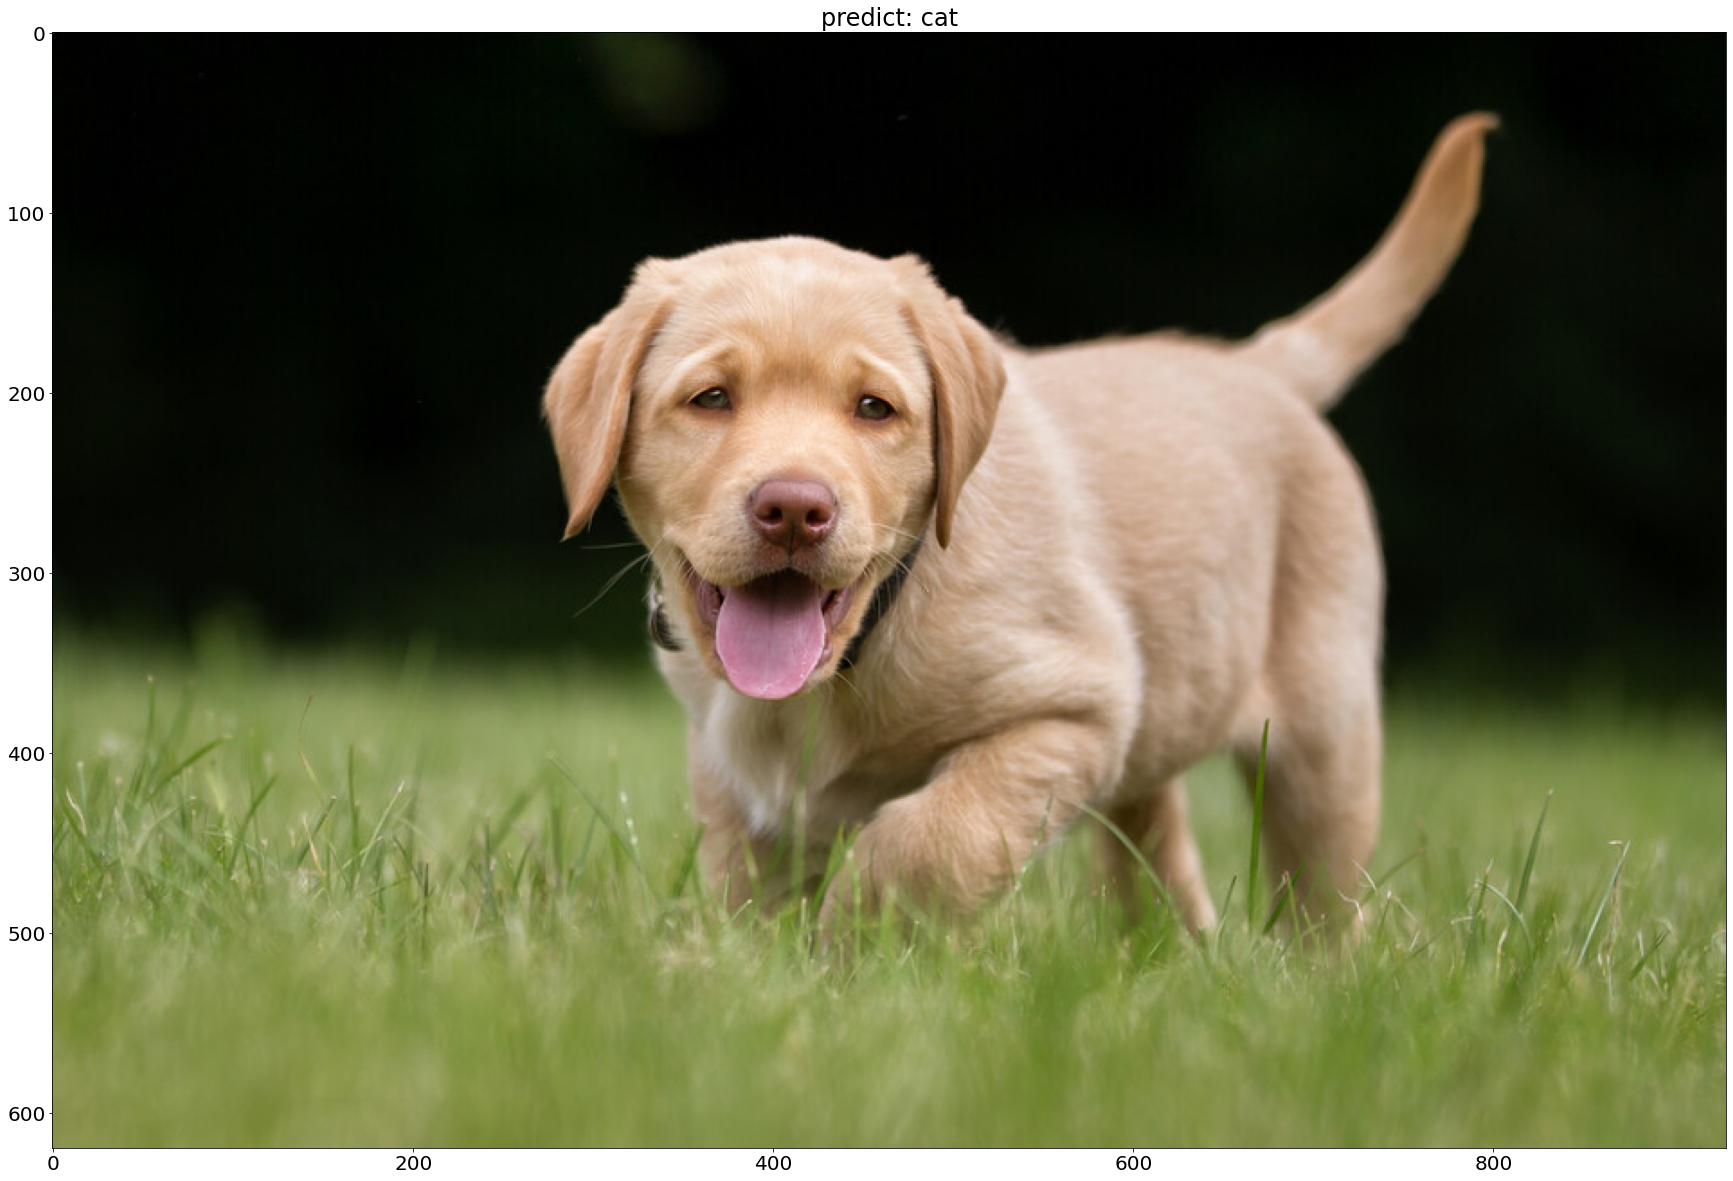

In [47]:
plt.rc('font', size = 20)
# 이미지를 출력(가로, 세로 30)
fig = plt.figure(figsize = (30,30))
# 예측값 대입
model_out = predict[0]
# 예측값이 1일떄
if model_out == 1:
    # cat대입
    str_label = 'cat'
else:
    # dog대입
    str_label = 'dog'
# 이미지의 제목으로 예측한 이미지 이름 출력    
plt.title('predict: %s' % str_label)
# 이미지 출력
plt.imshow(image)
# 그래프를 화면에 그림
#plt.show()